In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
X_test = images[9690:11990]
y_test = masks[9690:11990]

In [4]:
images = images[:9690]
masks = masks[:9690]

In [5]:
images.shape

(9690, 512, 512, 1)

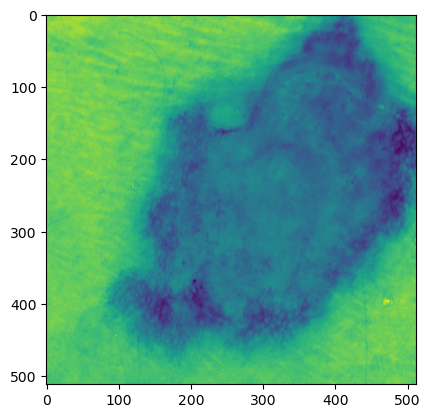

In [6]:
imshow(images[100])

In [7]:
masks.shape

(9690, 512, 512, 1)

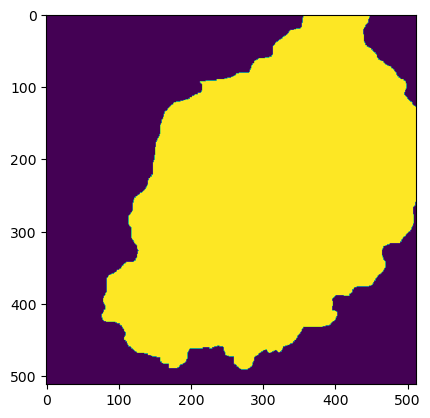

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmp13gi8le1kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpx8bqkv6hkuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpx8bqkv6hkuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=3, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_1_3_test.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
31/31 [==============================] - 33s 742ms/step - loss: 0.1253 - dice_coeff: 0.8749 - val_loss: 0.1279 - val_dice_coeff: 0.8755
Epoch 2/100
31/31 [==============================] - 15s 487ms/step - loss: 0.1164 - dice_coeff: 0.8784 - val_loss: 0.1171 - val_dice_coeff: 0.8834
Epoch 3/100
31/31 [==============================] - 15s 498ms/step - loss: 0.0934 - dice_coeff: 0.9054 - val_loss: 0.1182 - val_dice_coeff: 0.8796
Epoch 4/100
31/31 [==============================] - 15s 487ms/step - loss: 0.0808 - dice_coeff: 0.9162 - val_loss: 0.1188 - val_dice_coeff: 0.8937
Epoch 5/100
31/31 [==============================] - 15s 495ms/step - loss: 0.0737 - dice_coeff: 0.9242 - val_loss: 0.1342 - val_dice_coeff: 0.8970
Epoch 6/100
31/31 [==============================] - 15s 492ms/step - loss: 0.0690 - dice_coeff: 0.9299 - val_loss: 0.1376 - val_dice_coeff: 0.8989
Epoch 7/100
31/31 [==============================] - 15s 484ms/step 

In [16]:
R.classifier_scores

[[0.1809185892343521, 0.8433295488357544],
 [0.19025495648384094, 0.8794437646865845],
 [0.2599697709083557, 0.9015706777572632]]

In [17]:
R.discriminator_scores

[[9.406963727087714e-06, 1.0], [0.0, 1.0], [0.0, 1.0]]

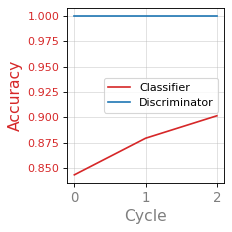

In [18]:
R.plot()

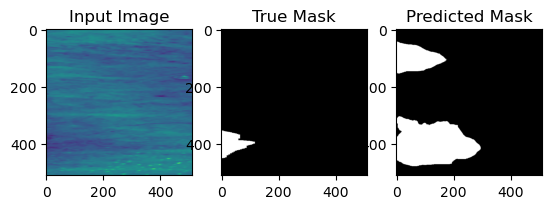

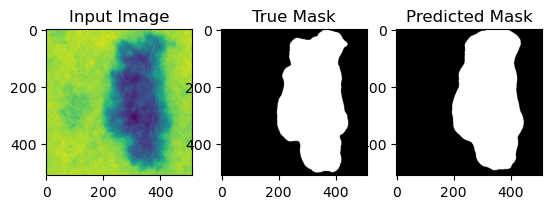

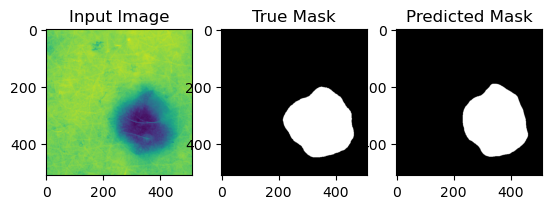

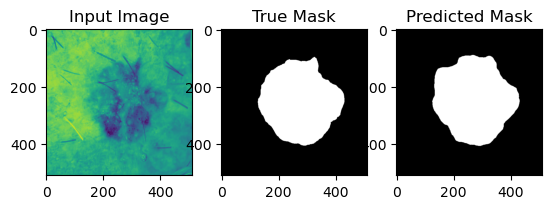

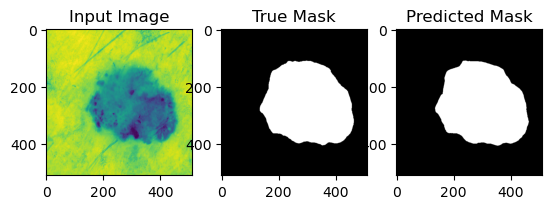

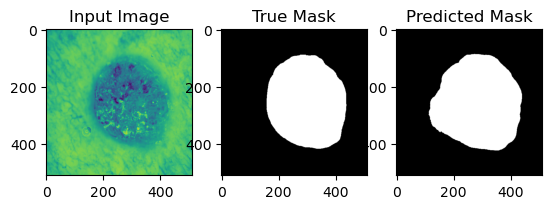

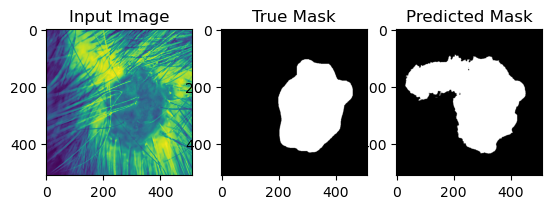

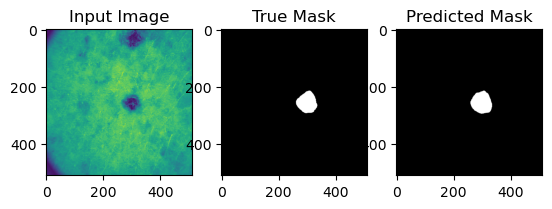

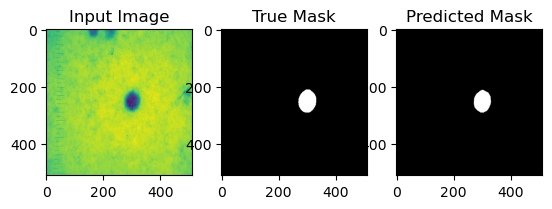

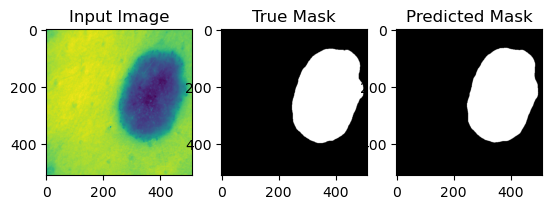

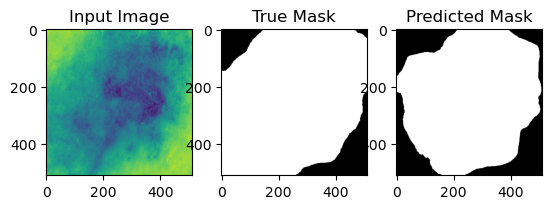

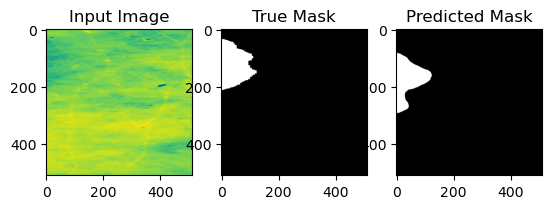

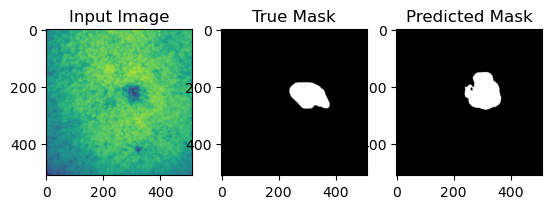

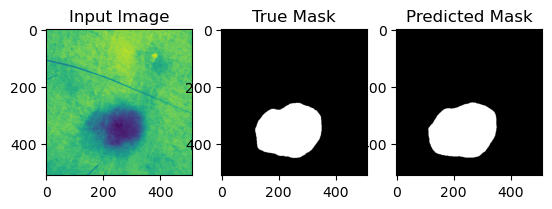

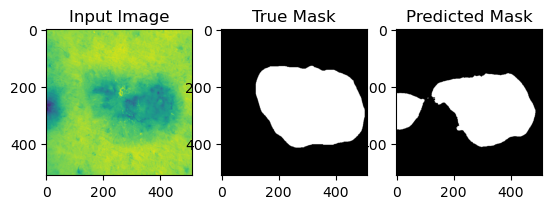

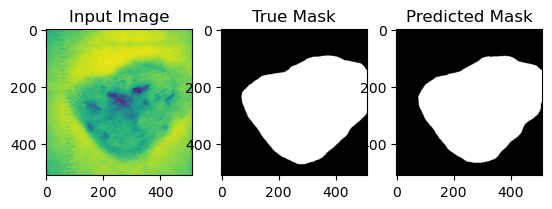

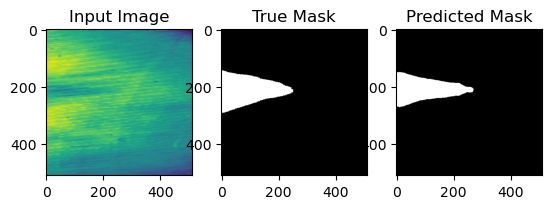

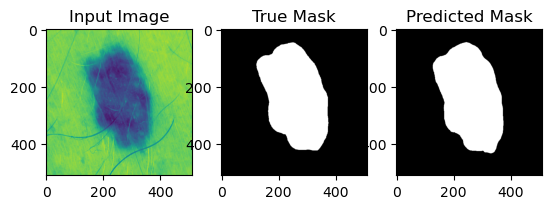

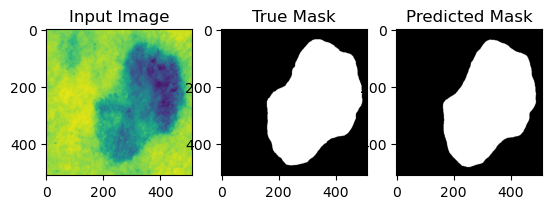

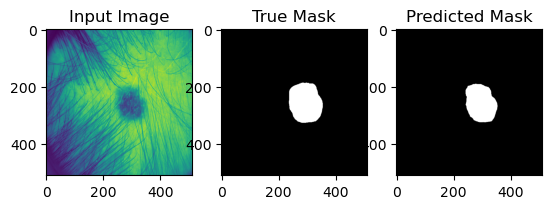

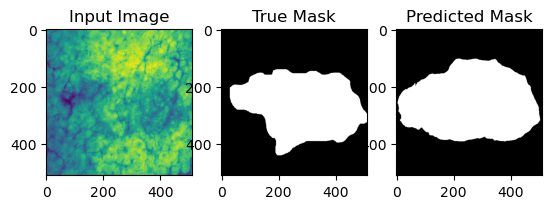

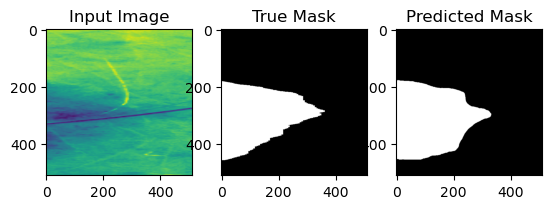

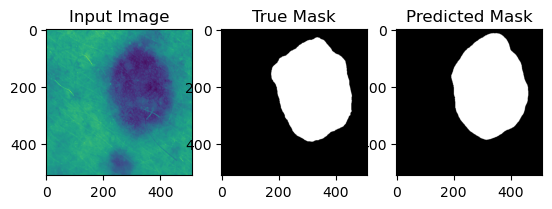

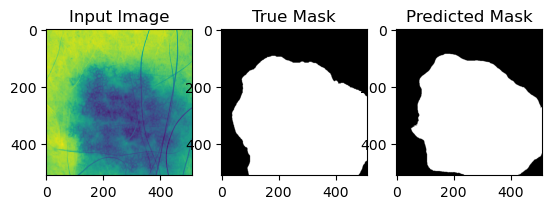

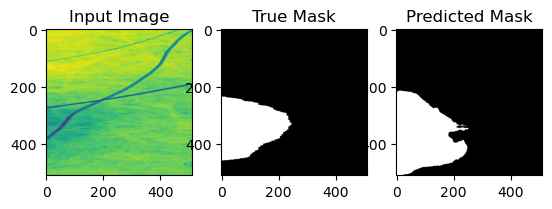

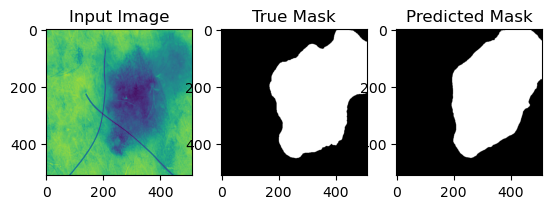

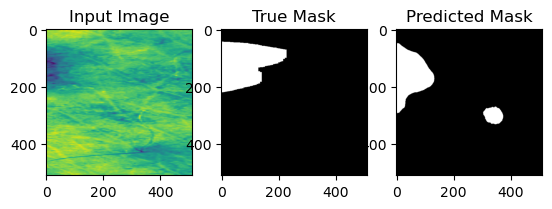

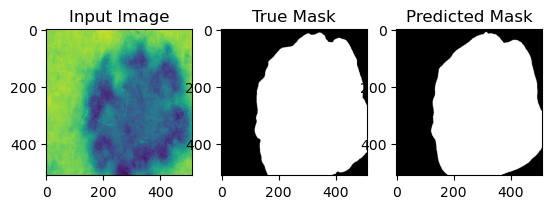

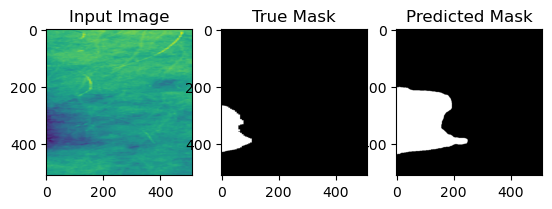

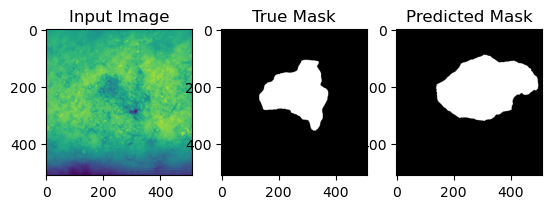

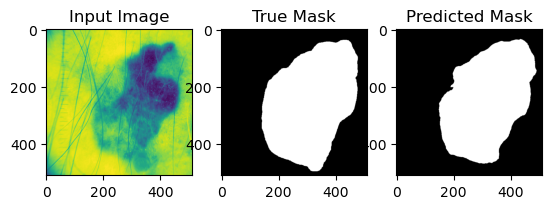

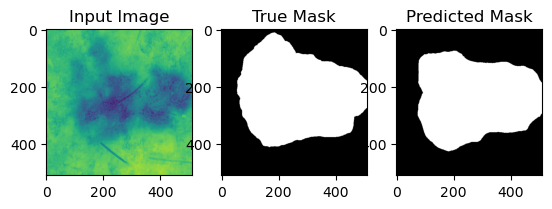

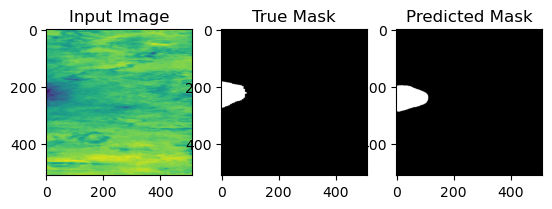

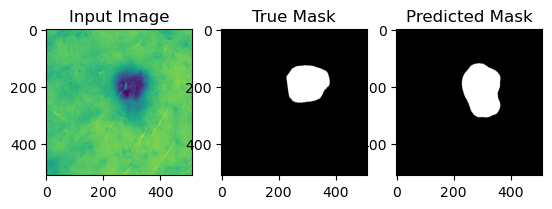

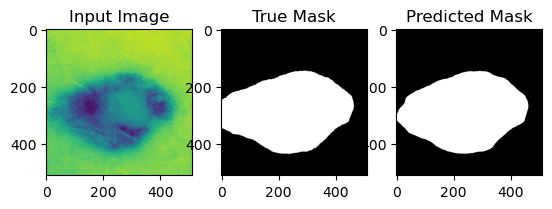

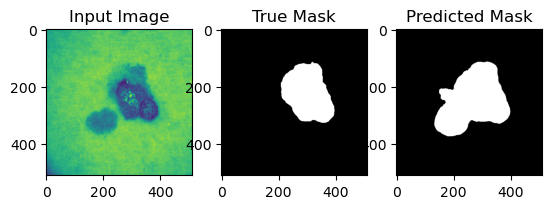

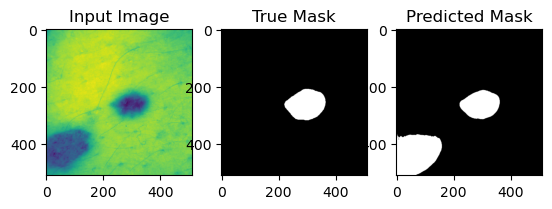

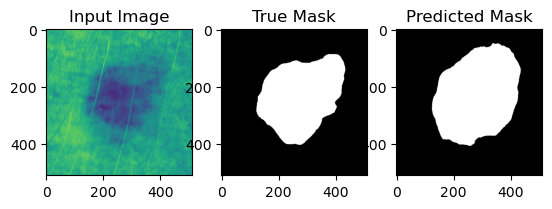

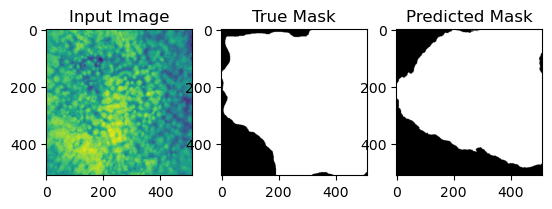

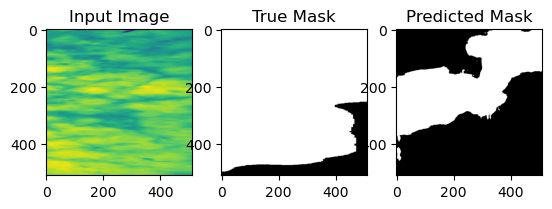

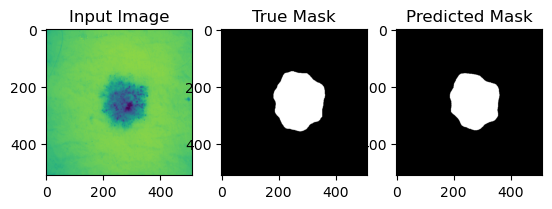

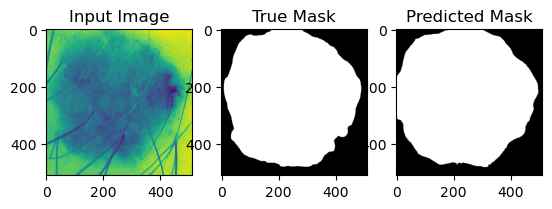

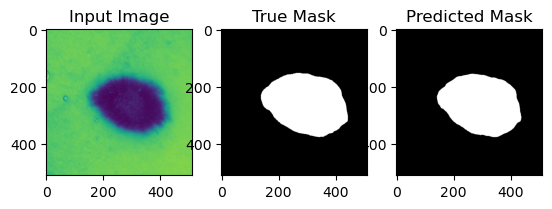

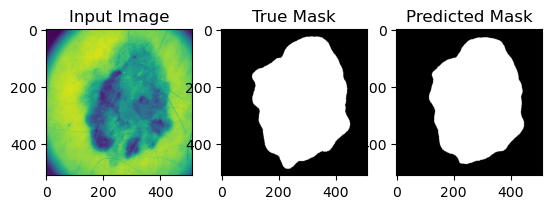

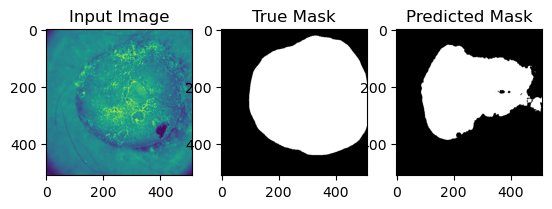

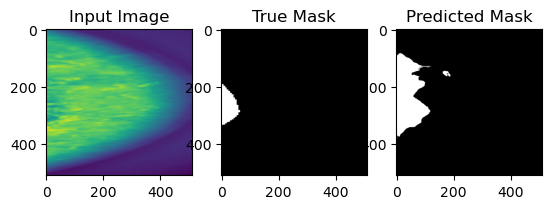

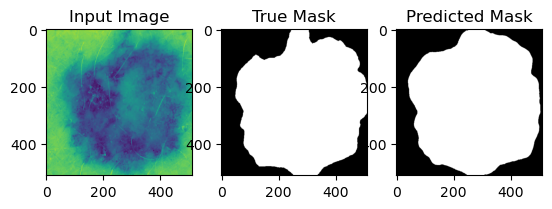

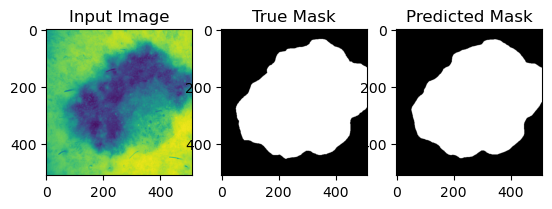

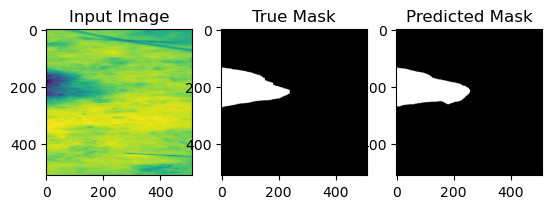

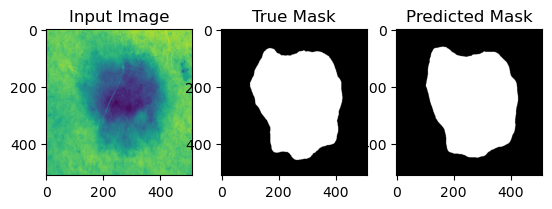

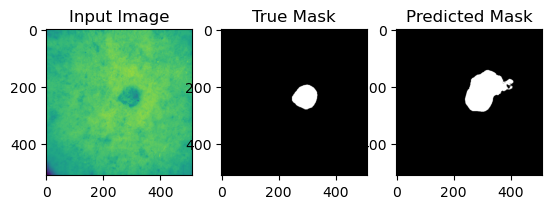

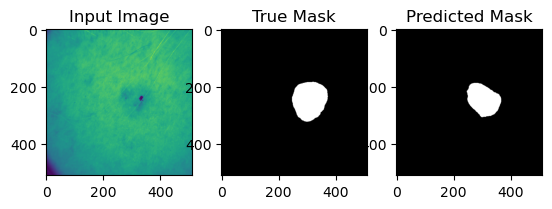

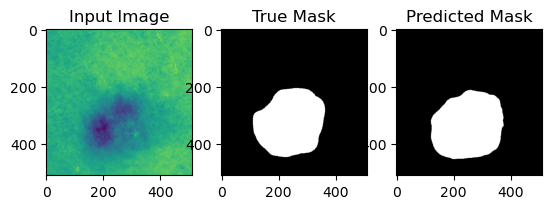

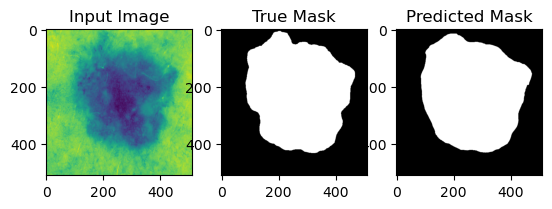

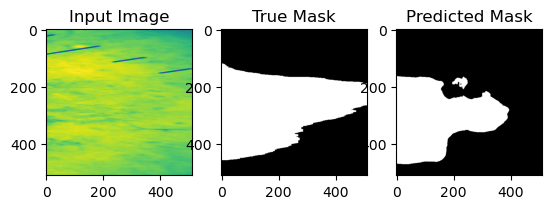

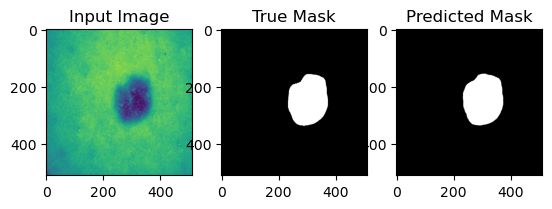

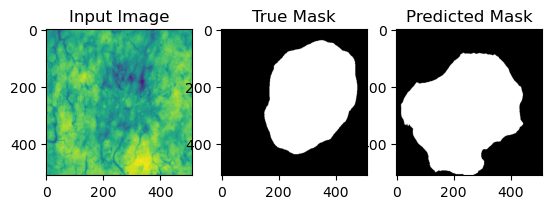

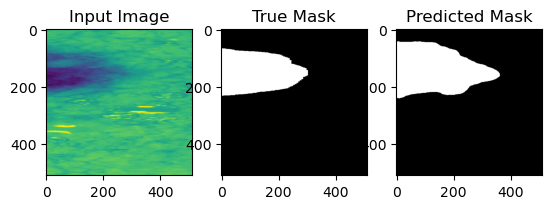

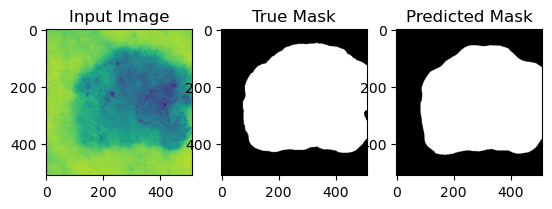

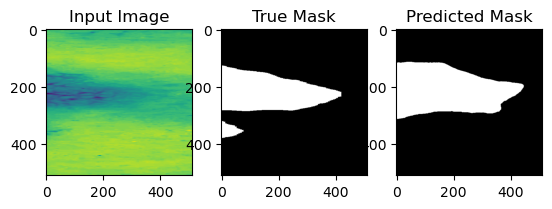

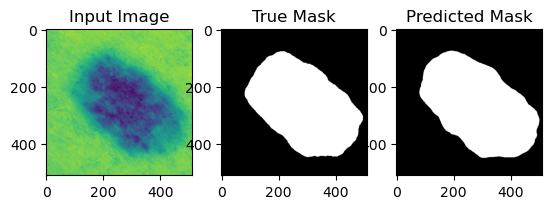

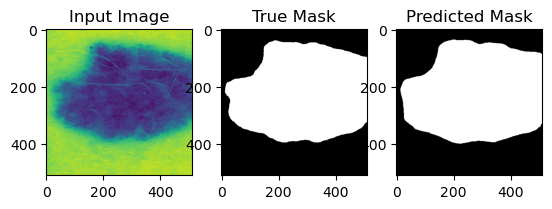

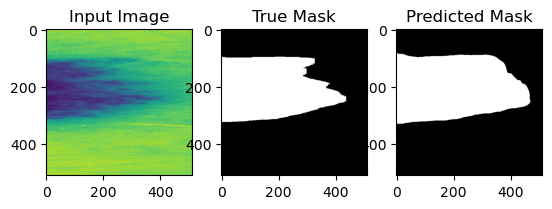

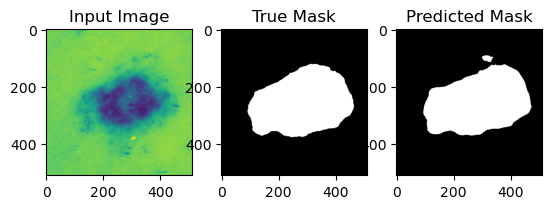

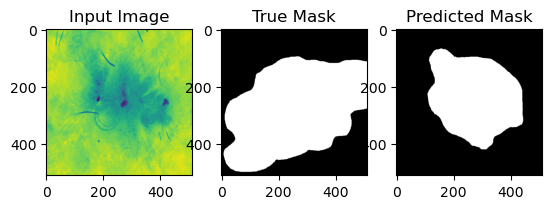

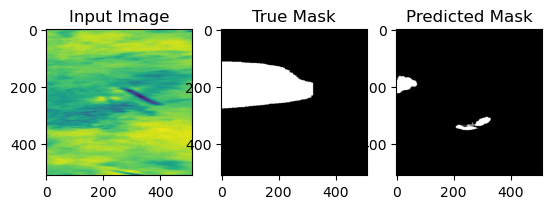

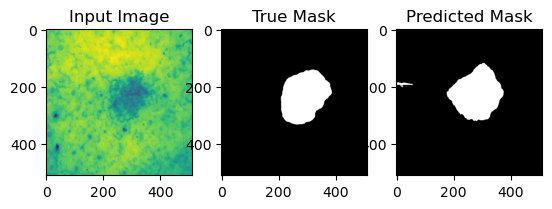

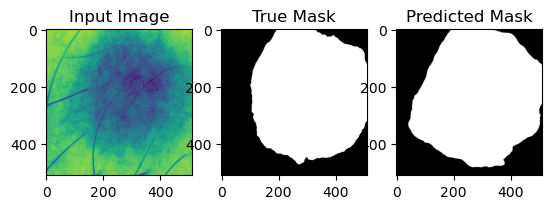

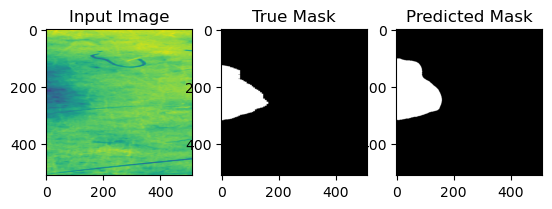

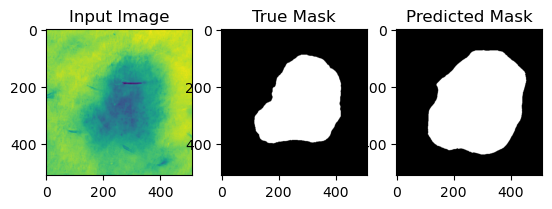

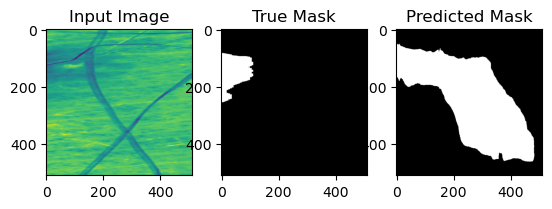

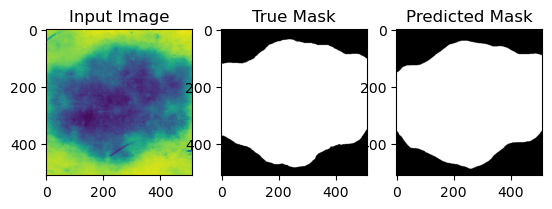

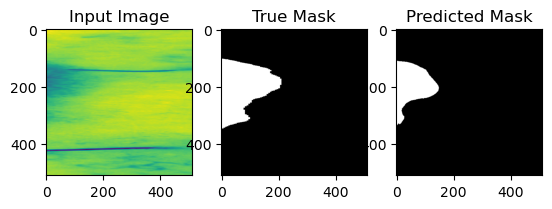

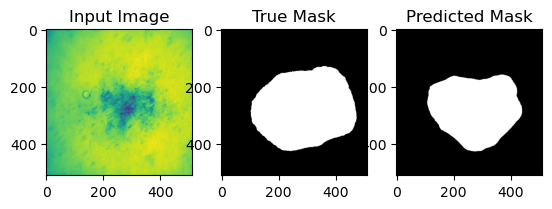

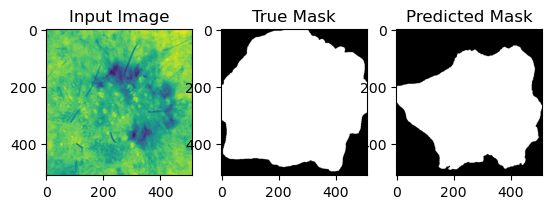

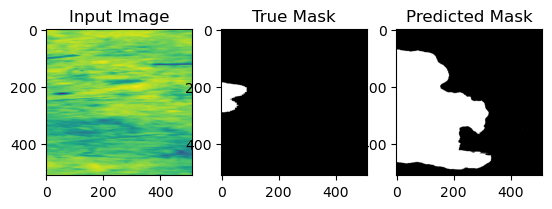

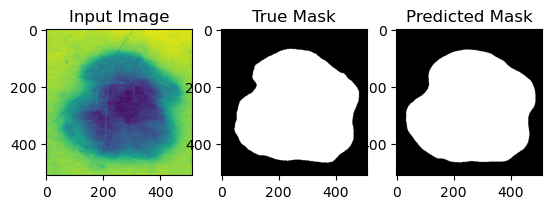

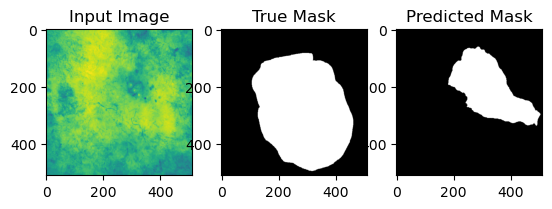

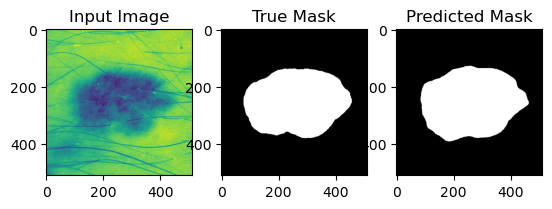

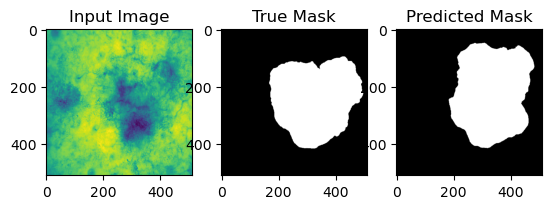

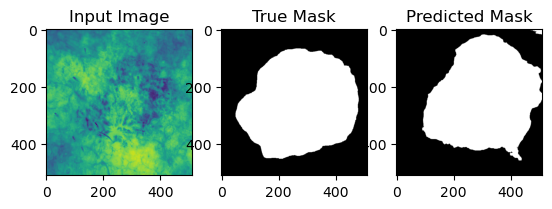

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [22]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmp13gi8le1kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpx8bqkv6hkuc_unet2d


In [23]:
barebone_pred = BareBone.predict(X_test, y_test)

In [24]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
R.classifier.model.metrics_names

['loss', 'dice_coeff']

In [26]:
BareBone.model.metrics_names

['loss', 'dice_coeff']